In [198]:
import pandas as pd
import numpy as np
import json
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import os
from konlpy.tag import Hannanum
import requests
import re
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [2]:
news = pd.read_excel("project1/data/mk_news_201901_202006.xlsx")

In [3]:
news['pubdate'] = pd.to_datetime(news['pubdate'], format = '%Y%m%d', errors = 'raise')

In [4]:
news.head()

,no,pubdate,pubtime,title1,body,keywords
0,2304119,2020-03-12,0.0,사회일반,NaN,NaN
1,3937779,2019-01-12,0.0,출판/도서,<!--[[--image0--]]//--> ◆ 야바위 게임 / 마이클 슈월비 지음...,"신간,소개"
2,3953320,2019-01-01,0.0,테마기획,◆ 2019 경제기상도 / 부동산 ◆ \n <!--[[--image0--]]//--...,"ㅈ,ㅈ"
3,3953321,2019-01-01,0.0,테마기획,◆ 2019 경제기상도 / 금리 ◆ \n <!--[[--image0--]]//-->...,"금리,경제기상도"
4,3953324,2019-01-01,0.0,테마기획,<!--[[--image0--]]//--> '황금돼지해'인 2019년 기해년(己亥...,"경제,성장,경제기상도"


# 2019.02 데이터

In [5]:
news_201902 = news[(news['pubdate']>='2019-02-01') & (news['pubdate']<'2019-03-01')]
news_201902

,no,pubdate,pubtime,title1,body,keywords
16707,3984663,2019-02-01,0.0,테마기획,<!--[[--image0--]]//--> 올해 설 연휴 귀성길은 예년에 비해 교...,"설,귀성"
16708,3984665,2019-02-01,0.0,테마기획,<!--[[--image0--]]//--> 설 연휴 기간에 귀성 혹은 역귀성을 위...,"보,험"
16709,3984666,2019-02-01,0.0,테마기획,"<!--[[--image0--]]//--> '어른들에게는 어릴 적 향수를, 아이들...","설특집,가볼만한곳"
16710,3984667,2019-02-01,0.0,테마기획,"<!--[[--image0--]]//--> ""생선 머리는 어느 쪽을 바라보게 둬야...","설,서비스"
16711,3984668,2019-02-01,0.0,테마기획,설 연휴 기간 응급의료가 필요한 상황이 닥칠 경우 119를 이용하면 된다. 소방청은...,"설 연휴,응급환자"
...,...,...,...,...,...,...
30898,4012550,2019-02-28,40023.0,의약/건강,<!--[[--image0--]]//--> 국제 공동 연구진이 미숙아의 혈압이나...,"미숙아,센서"
31616,4014340,2019-02-28,93304.0,증권계동향,증시가 다양한 호재와 악재의 혼재로 확실한 방향성을 정하지 못하고 있는 모습이다. ...,NaN
31624,4014351,2019-02-28,93355.0,증권계동향,"전문가들은 ""코스피의 움직임이 제한적인 가운데 종목별, 업종별 이슈 중심의 순환매가...",NaN
31625,4014352,2019-02-28,93436.0,증권계동향,전문가들은 코스피가 3월에도 오름세는 이어질 것으로 예상되지만 여전히 관망세에 무게...,NaN


In [6]:
news_201902['body1'] = news_201902['body'].apply(lambda x : re.sub('[0-9]+', '', x))
news_201902['body1'] = news_201902['body1'].apply(lambda x : re.sub('[A-Za-z]+', '', x))
news_201902['body1'] = news_201902['body1'].apply(lambda x : re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》◆■\n]', '', x))

<ipython-input-6-70ed802fb590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201902['body1'] = news_201902['body'].apply(lambda x : re.sub('[0-9]+', '', x))
<ipython-input-6-70ed802fb590>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201902['body1'] = news_201902['body1'].apply(lambda x : re.sub('[A-Za-z]+', '', x))
<ipython-input-6-70ed802fb590>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [7]:
news_201902

,no,pubdate,pubtime,title1,body,keywords,body1
16707,3984663,2019-02-01,0.0,테마기획,<!--[[--image0--]]//--> 올해 설 연휴 귀성길은 예년에 비해 교...,"설,귀성",올해 설 연휴 귀성길은 예년에 비해 교통체증이 한결 덜할 것으로 전망된다 지난해...
16708,3984665,2019-02-01,0.0,테마기획,<!--[[--image0--]]//--> 설 연휴 기간에 귀성 혹은 역귀성을 위...,"보,험",설 연휴 기간에 귀성 혹은 역귀성을 위해 자동차 운전대를 잡는 일이 많다 이 경...
16709,3984666,2019-02-01,0.0,테마기획,"<!--[[--image0--]]//--> '어른들에게는 어릴 적 향수를, 아이들...","설특집,가볼만한곳",어른들에게는 어릴 적 향수를 아이들에게는 잊지 못할 추억을이번 설연휴 기간에도 ...
16710,3984667,2019-02-01,0.0,테마기획,"<!--[[--image0--]]//--> ""생선 머리는 어느 쪽을 바라보게 둬야...","설,서비스",생선 머리는 어느 쪽을 바라보게 둬야 할까민족 대명절 설이 돌아왔다 이번 설 연...
16711,3984668,2019-02-01,0.0,테마기획,설 연휴 기간 응급의료가 필요한 상황이 닥칠 경우 119를 이용하면 된다. 소방청은...,"설 연휴,응급환자",설 연휴 기간 응급의료가 필요한 상황이 닥칠 경우 를 이용하면 된다 소방청은 설 연...
...,...,...,...,...,...,...,...
30898,4012550,2019-02-28,40023.0,의약/건강,<!--[[--image0--]]//--> 국제 공동 연구진이 미숙아의 혈압이나...,"미숙아,센서",국제 공동 연구진이 미숙아의 혈압이나 심박수 등을 무선으로 측정할 수 있는 기...
31616,4014340,2019-02-28,93304.0,증권계동향,증시가 다양한 호재와 악재의 혼재로 확실한 방향성을 정하지 못하고 있는 모습이다. ...,NaN,증시가 다양한 호재와 악재의 혼재로 확실한 방향성을 정하지 못하고 있는 모습이다 특...
31624,4014351,2019-02-28,93355.0,증권계동향,"전문가들은 ""코스피의 움직임이 제한적인 가운데 종목별, 업종별 이슈 중심의 순환매가...",NaN,전문가들은 코스피의 움직임이 제한적인 가운데 종목별 업종별 이슈 중심의 순환매가 예...
31625,4014352,2019-02-28,93436.0,증권계동향,전문가들은 코스피가 3월에도 오름세는 이어질 것으로 예상되지만 여전히 관망세에 무게...,NaN,전문가들은 코스피가 월에도 오름세는 이어질 것으로 예상되지만 여전히 관망세에 무게를...


In [8]:
okt = Okt()

In [9]:
news_201902['freq'] = news_201902['body1'].apply(lambda x : okt.nouns(x))

<ipython-input-9-e90574646aa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201902['freq'] = news_201902['body1'].apply(lambda x : okt.nouns(x))


In [10]:
news_201902['freq_10'] = news_201902['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))

<ipython-input-10-a03eaeff590f>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  news_201902['freq_10'] = news_201902['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))
<ipython-input-10-a03eaeff590f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201902['freq_10'] = news_201902['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))


In [11]:
news_201902['freq_10'] = news_201902['freq_10'].apply(lambda x : ",".join(x))

<ipython-input-11-79382d2b50b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201902['freq_10'] = news_201902['freq_10'].apply(lambda x : ",".join(x))


In [12]:
news_201902

,no,pubdate,pubtime,title1,body,keywords,body1,freq,freq_10
16707,3984663,2019-02-01,0.0,테마기획,<!--[[--image0--]]//--> 올해 설 연휴 귀성길은 예년에 비해 교...,"설,귀성",올해 설 연휴 귀성길은 예년에 비해 교통체증이 한결 덜할 것으로 전망된다 지난해...,"[올해, 설, 연휴, 귀성, 예년, 교통체증, 한결, 것, 전망, 지난해, 기간, ...","시간,일,월,등,서울,것,교통,이용,인원,시"
16708,3984665,2019-02-01,0.0,테마기획,<!--[[--image0--]]//--> 설 연휴 기간에 귀성 혹은 역귀성을 위...,"보,험",설 연휴 기간에 귀성 혹은 역귀성을 위해 자동차 운전대를 잡는 일이 많다 이 경...,"[설, 연휴, 기간, 귀성, 역, 귀성, 위해, 자동차, 운전대, 이, 경우, 운전...","서비스,점검,가입,경우,일,무상,차량,손보,운전,고객"
16709,3984666,2019-02-01,0.0,테마기획,"<!--[[--image0--]]//--> '어른들에게는 어릴 적 향수를, 아이들...","설특집,가볼만한곳",어른들에게는 어릴 적 향수를 아이들에게는 잊지 못할 추억을이번 설연휴 기간에도 ...,"[어른, 적, 향수, 아이, 추억, 이번, 설연휴, 기간, 전국, 윷놀이, 널뛰기,...","등,일,체험,행사,수,전통,윷놀이,시,연휴,설"
16710,3984667,2019-02-01,0.0,테마기획,"<!--[[--image0--]]//--> ""생선 머리는 어느 쪽을 바라보게 둬야...","설,서비스",생선 머리는 어느 쪽을 바라보게 둬야 할까민족 대명절 설이 돌아왔다 이번 설 연...,"[생선, 머리, 쪽, 민족, 명절, 설, 이번, 설, 연휴, 주말, 포함, 무려, ...","앱,수,연휴,정보,설,명절,것,노래방,시간,일"
16711,3984668,2019-02-01,0.0,테마기획,설 연휴 기간 응급의료가 필요한 상황이 닥칠 경우 119를 이용하면 된다. 소방청은...,"설 연휴,응급환자",설 연휴 기간 응급의료가 필요한 상황이 닥칠 경우 를 이용하면 된다 소방청은 설 연...,"[설, 연휴, 기간, 응급의료, 상황, 경우, 를, 이용, 소방청, 설, 연휴, 기...","기간,연휴,약국,병원,기관,의료,설,등,응급의료,운영"
...,...,...,...,...,...,...,...,...,...
30898,4012550,2019-02-28,40023.0,의약/건강,<!--[[--image0--]]//--> 국제 공동 연구진이 미숙아의 혈압이나...,"미숙아,센서",국제 공동 연구진이 미숙아의 혈압이나 심박수 등을 무선으로 측정할 수 있는 기...,"[국제, 공동, 구진, 미숙아, 혈압, 심박수, 등, 무선, 측정, 수, 기술, 개...","센서,아기,수,무선,등,구진,개발,기존,신생아,것"
31616,4014340,2019-02-28,93304.0,증권계동향,증시가 다양한 호재와 악재의 혼재로 확실한 방향성을 정하지 못하고 있는 모습이다. ...,NaN,증시가 다양한 호재와 악재의 혼재로 확실한 방향성을 정하지 못하고 있는 모습이다 특...,"[증시, 호재, 악, 재의, 혼재, 방향성, 정, 못, 모습, 밸류, 션, 부담, ...","탁론,종목,수,호스,금리,투자자,대출,상품,이용,수수료"
31624,4014351,2019-02-28,93355.0,증권계동향,"전문가들은 ""코스피의 움직임이 제한적인 가운데 종목별, 업종별 이슈 중심의 순환매가...",NaN,전문가들은 코스피의 움직임이 제한적인 가운데 종목별 업종별 이슈 중심의 순환매가 예...,"[전문가, 코스피, 움직임, 제한, 가운데, 종목, 별, 업종, 별, 이슈, 중심,...","종목,탁론,스,투자자,골드,수,상담,가능,대출,업종"
31625,4014352,2019-02-28,93436.0,증권계동향,전문가들은 코스피가 3월에도 오름세는 이어질 것으로 예상되지만 여전히 관망세에 무게...,NaN,전문가들은 코스피가 월에도 오름세는 이어질 것으로 예상되지만 여전히 관망세에 무게를...,"[전문가, 코스피, 월, 것, 예상, 관망, 세, 무게, 다만, 대외, 이벤트, 대...","탁론,수,종목,호스,금리,것,투자자,이용,상품,대출"


In [14]:
keywords = news_201902['freq_10'].apply(lambda x : x.split(','))

In [15]:
keyword_list = []
for i in keywords.index :
    keyword_list += keywords[i]

In [71]:
sublist = []
for x in keyword_list :       # 한 글자 키워드 제거 
    if len(x) == 1 : 
        sublist.append(x)

In [73]:
for x in sublist :
    keyword_list.remove(x)

In [75]:
count = Counter(keyword_list)
noun_list = count.most_common(100)   # 키워드 개수가 많은 순서로 100개만 추출

In [140]:
import matplotlib.font_manager as fm

In [143]:
font_path = 'C:/Windows/Fonts/H2GTRE.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

### 2019.02와 2020.02 전체 키워드 wordcloud 비교

1. 2019.02 
    - 한국, 미국, 대통령, 정상회담 같은 키워드가 눈에 띔 -> 정치, 외교적인 부분 이슈
    - 2020.02와 비교해서 금리 키워드가 눈에 띔 -> 두 기간 비슷하게 소비패턴이 줄었는데 2020.02에는 금리라는 키워드가 없고 2019.02에만 존재 -> 낮은 금리가 소비에 영향을 미쳤다고 볼 수 있음.

2. 2020.02
    - 코로나, 중국, 신종, 환자, 감염 등의 키워드가 눈에 띔 -> 코로나 바이러스 이슈
    - 소비가 감소한 확실한 원인이 존재.

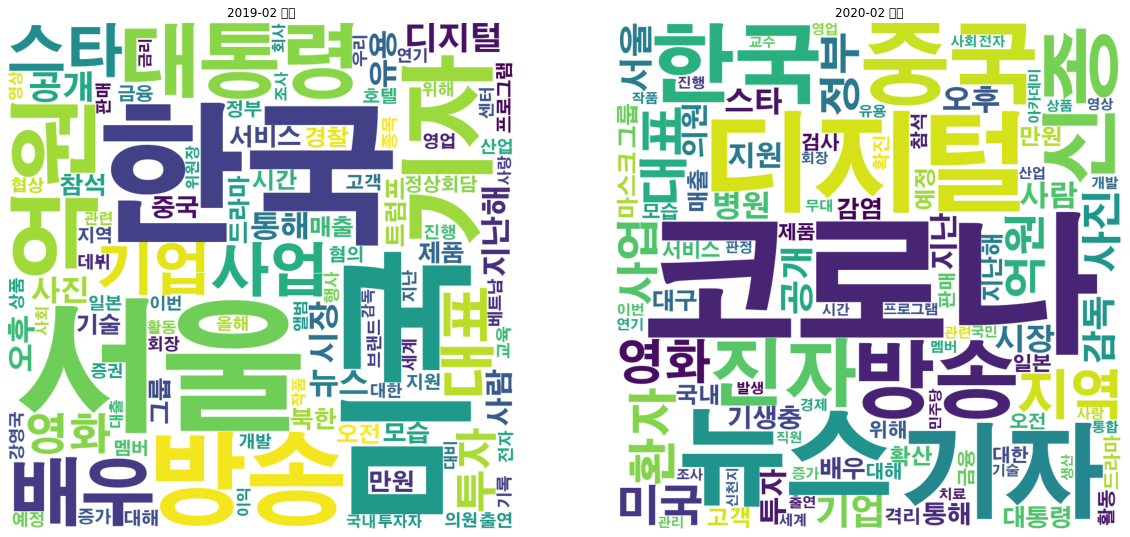

In [153]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result = wc.generate_from_frequencies(dict(noun_list))
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(wc_result)
plt.axis('off')
plt.title('2019-02 전체')
plt.subplot(1, 2, 2)
plt.imshow(wc_result5)
plt.axis('off')
plt.title('2020-02 전체')
plt.show()

In [158]:
keywords2 = news_201902[news_201902['title1'] == '사회일반']['freq_10'].apply(lambda x : x.split(','))

In [159]:
keyword_list2 = []
for i in keywords2.index :
    keyword_list2 += keywords2[i]

In [160]:
sublist = []
for x in keyword_list2 :
    if len(x) == 1 : 
        sublist.append(x)

In [161]:
for x in sublist :
    keyword_list2.remove(x)

In [162]:
count2 = Counter(keyword_list2)
noun_list2 = count2.most_common(100)

### 2019.02와 2020.02 사회일반 키워드 wordcloud 비교

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54924 missing from current f

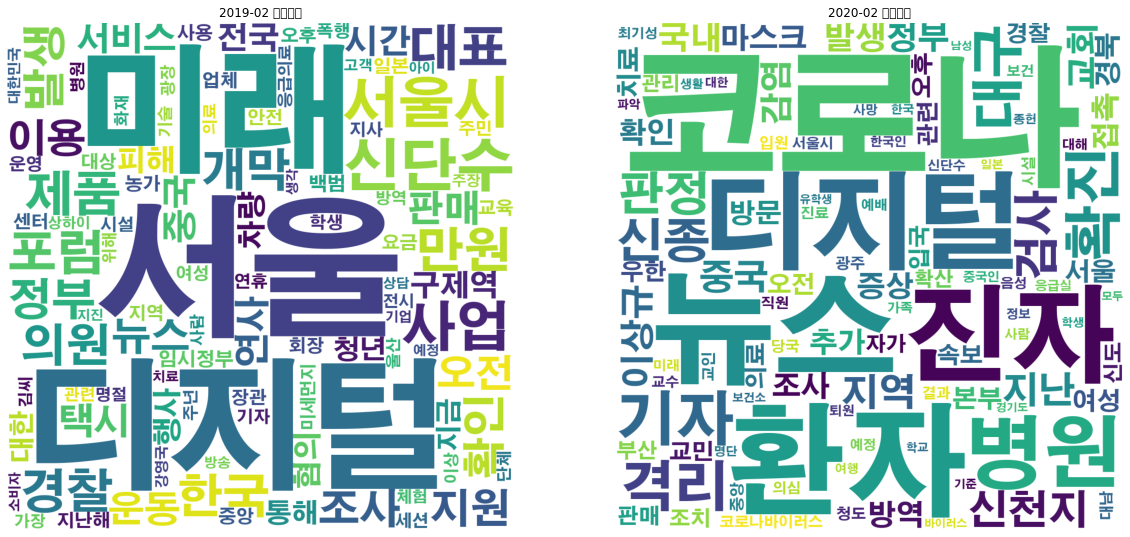

In [169]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result2 = wc.generate_from_frequencies(dict(noun_list2))
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(wc_result2)
plt.axis('off')
plt.title('2019-02 사회일반')
plt.subplot(1, 2, 2)
plt.imshow(wc_result6)
plt.axis('off')
plt.title('2020-02 사회일반')
plt.show()

In [178]:
keywords3 = news_201902[news_201902['title1'] == '핫이슈']['freq_10'].apply(lambda x : x.split(','))

In [179]:
keyword_list3 = []
for i in keywords3.index :
    keyword_list3 += keywords3[i]

In [180]:
sublist = []
for x in keyword_list3 :
    if len(x) == 1 : 
        sublist.append(x)

In [181]:
for x in sublist :
    keyword_list3.remove(x)

In [182]:
count3 = Counter(keyword_list3)
noun_list3 = count3.most_common(100)

### 2019.02와 2020.02 핫이슈 키워드 wordcloud 비교

핫이슈 키워드는 2020.02의 코로나를 제외하면 두 기간 다 연예게 위주의 키워드만 존재

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54635 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49800 missing from current fon

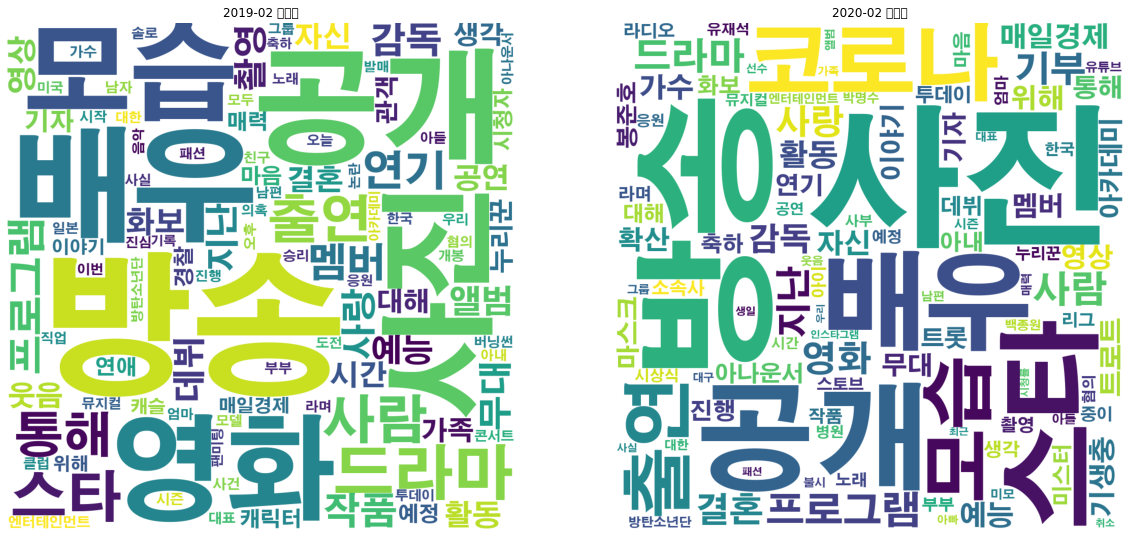

In [185]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result3 = wc.generate_from_frequencies(dict(noun_list3))
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(wc_result3)
plt.axis('off')
plt.title('2019-02 핫이슈')
plt.subplot(1, 2, 2)
plt.imshow(wc_result7)
plt.axis('off')
plt.title('2020-02 핫이슈')
plt.show()

# 2019.03 데이터

In [100]:
news_201903 = news[(news['pubdate']>='2019-03-01') & (news['pubdate']<'2019-04-01')]
news_201903

,no,pubdate,pubtime,title1,body,keywords
29618,4010109,2019-03-04,0.0,중견/중소기업,평생교육 대표 기업 휴넷(대표 조영탁)이 공인중개사 시험에 합격할 때까지 평생 수강...,"휴넷,공인중개사"
30545,4011800,2019-03-01,0.0,법원·검찰·경찰,관세청 인사에 개입하고 '뒷돈'을 챙긴 혐의로 재판에 넘겨진 최순실 씨의 옛 지인 ...,"고영태,대법"
30554,4011815,2019-03-01,0.0,법원·검찰·경찰,생후 8개월 아들을 때려 숨지게 한 뒤 시신을 방치한 40대 여성에게 대법원이 징역...,"법원,대법"
30557,4011823,2019-03-01,0.0,인물/인터뷰,"""평생 등이 굽은 채로 살아가야 할 줄 알았는데 이렇게 치료해주셔서 너무나 감사합니...","아프리카,아프리카 마다가스카르,마다가스카르,한림대동탄성심병원,동탄성심병원,나린드라,..."
30559,4011828,2019-03-01,0.0,증권계동향,3월 미래에셋생명·하나금융지주 등 일부 지분에 대한 의무보호예수가 해제된다. 이에 ...,"예탁결제원,미래에셋생명,의무보호예수"
...,...,...,...,...,...,...
47850,4046097,2019-03-29,105535.0,증권계동향,반도체 수요가 2분기 바닥을 찍고 3분기부터 다시 회복세로 돌아설 것이라는 전망이 ...,NaN
47851,4046098,2019-03-29,105721.0,증권계동향,오는 10일-11일 한·미 정상회담 개최 소식에 남북경협주가 상승세를 보이고 있다....,NaN
47904,4046180,2019-03-29,105802.0,증권계동향,국내 주요 증권사 리서치센터장들은 올해 2분기 코스피 시장이 기업 실적 부진과 경기...,NaN
47905,4046181,2019-03-29,105850.0,증권계동향,증시 전문가들은 2분기 코스피 시장이 2100~2300선에서 움직이는 박스권 장세를...,NaN


In [101]:
news_201903['body1'] = news_201903['body'].apply(lambda x : re.sub('[0-9]+', '', x))
news_201903['body1'] = news_201903['body1'].apply(lambda x : re.sub('[A-Za-z]+', '', x))
news_201903['body1'] = news_201903['body1'].apply(lambda x : re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》◆■\n]', '', x))

<ipython-input-101-0c657a05e457>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201903['body1'] = news_201903['body'].apply(lambda x : re.sub('[0-9]+', '', x))
<ipython-input-101-0c657a05e457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201903['body1'] = news_201903['body1'].apply(lambda x : re.sub('[A-Za-z]+', '', x))
<ipython-input-101-0c657a05e457>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [102]:
news_201903

,no,pubdate,pubtime,title1,body,keywords,body1
29618,4010109,2019-03-04,0.0,중견/중소기업,평생교육 대표 기업 휴넷(대표 조영탁)이 공인중개사 시험에 합격할 때까지 평생 수강...,"휴넷,공인중개사",평생교육 대표 기업 휴넷대표 조영탁이 공인중개사 시험에 합격할 때까지 평생 수강을 ...
30545,4011800,2019-03-01,0.0,법원·검찰·경찰,관세청 인사에 개입하고 '뒷돈'을 챙긴 혐의로 재판에 넘겨진 최순실 씨의 옛 지인 ...,"고영태,대법",관세청 인사에 개입하고 뒷돈을 챙긴 혐의로 재판에 넘겨진 최순실 씨의 옛 지인 고영...
30554,4011815,2019-03-01,0.0,법원·검찰·경찰,생후 8개월 아들을 때려 숨지게 한 뒤 시신을 방치한 40대 여성에게 대법원이 징역...,"법원,대법",생후 개월 아들을 때려 숨지게 한 뒤 시신을 방치한 대 여성에게 대법원이 징역 년을...
30557,4011823,2019-03-01,0.0,인물/인터뷰,"""평생 등이 굽은 채로 살아가야 할 줄 알았는데 이렇게 치료해주셔서 너무나 감사합니...","아프리카,아프리카 마다가스카르,마다가스카르,한림대동탄성심병원,동탄성심병원,나린드라,...",평생 등이 굽은 채로 살아가야 할 줄 알았는데 이렇게 치료해주셔서 너무나 감사합니다...
30559,4011828,2019-03-01,0.0,증권계동향,3월 미래에셋생명·하나금융지주 등 일부 지분에 대한 의무보호예수가 해제된다. 이에 ...,"예탁결제원,미래에셋생명,의무보호예수",월 미래에셋생명하나금융지주 등 일부 지분에 대한 의무보호예수가 해제된다 이에 따라 ...
...,...,...,...,...,...,...,...
47850,4046097,2019-03-29,105535.0,증권계동향,반도체 수요가 2분기 바닥을 찍고 3분기부터 다시 회복세로 돌아설 것이라는 전망이 ...,NaN,반도체 수요가 분기 바닥을 찍고 분기부터 다시 회복세로 돌아설 것이라는 전망이 제기...
47851,4046098,2019-03-29,105721.0,증권계동향,오는 10일-11일 한·미 정상회담 개최 소식에 남북경협주가 상승세를 보이고 있다....,NaN,오는 일일 한미 정상회담 개최 소식에 남북경협주가 상승세를 보이고 있다 한미 정상이...
47904,4046180,2019-03-29,105802.0,증권계동향,국내 주요 증권사 리서치센터장들은 올해 2분기 코스피 시장이 기업 실적 부진과 경기...,NaN,국내 주요 증권사 리서치센터장들은 올해 분기 코스피 시장이 기업 실적 부진과 경기 ...
47905,4046181,2019-03-29,105850.0,증권계동향,증시 전문가들은 2분기 코스피 시장이 2100~2300선에서 움직이는 박스권 장세를...,NaN,증시 전문가들은 분기 코스피 시장이 선에서 움직이는 박스권 장세를 예상하고 있다 일...


In [103]:
news_201903['freq'] = news_201903['body1'].apply(lambda x : okt.nouns(x))

<ipython-input-103-84dfad82c4b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201903['freq'] = news_201903['body1'].apply(lambda x : okt.nouns(x))


In [108]:
news_201903['freq_10'] = news_201903['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))

<ipython-input-108-22e634b70efb>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  news_201903['freq_10'] = news_201903['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))
<ipython-input-108-22e634b70efb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201903['freq_10'] = news_201903['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))


In [109]:
news_201903['freq_10'] = news_201903['freq_10'].apply(lambda x : ",".join(x))

<ipython-input-109-1ae4508970dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201903['freq_10'] = news_201903['freq_10'].apply(lambda x : ",".join(x))


In [110]:
news_201903

,no,pubdate,pubtime,title1,body,keywords,body1,freq,freq_10
29618,4010109,2019-03-04,0.0,중견/중소기업,평생교육 대표 기업 휴넷(대표 조영탁)이 공인중개사 시험에 합격할 때까지 평생 수강...,"휴넷,공인중개사",평생교육 대표 기업 휴넷대표 조영탁이 공인중개사 시험에 합격할 때까지 평생 수강을 ...,"[평생교육, 대표, 기업, 휴넷, 대표, 조영탁, 공인, 중개사, 시험, 합격, 때...","합격,휴넷,수강,중,과정,중개사,시험,대표,평생,공인"
30545,4011800,2019-03-01,0.0,법원·검찰·경찰,관세청 인사에 개입하고 '뒷돈'을 챙긴 혐의로 재판에 넘겨진 최순실 씨의 옛 지인 ...,"고영태,대법",관세청 인사에 개입하고 뒷돈을 챙긴 혐의로 재판에 넘겨진 최순실 씨의 옛 지인 고영...,"[관세청, 인사, 개입, 뒷돈, 혐의, 재판, 최, 실, 씨, 지인, 영태, 씨, ...","혐의,징역,년월,고씨,알선,세관,명목,공무원,원심,년"
30554,4011815,2019-03-01,0.0,법원·검찰·경찰,생후 8개월 아들을 때려 숨지게 한 뒤 시신을 방치한 40대 여성에게 대법원이 징역...,"법원,대법",생후 개월 아들을 때려 숨지게 한 뒤 시신을 방치한 대 여성에게 대법원이 징역 년을...,"[생후, 개월, 아들, 뒤, 시신, 방치, 여성, 대법원, 징역, 년, 확정, 대법...","홍씨,미약,혐의,년,아들,범행,징역,등,선고,재판"
30557,4011823,2019-03-01,0.0,인물/인터뷰,"""평생 등이 굽은 채로 살아가야 할 줄 알았는데 이렇게 치료해주셔서 너무나 감사합니...","아프리카,아프리카 마다가스카르,마다가스카르,한림대동탄성심병원,동탄성심병원,나린드라,...",평생 등이 굽은 채로 살아가야 할 줄 알았는데 이렇게 치료해주셔서 너무나 감사합니다...,"[평생, 등, 굽, 채, 줄, 치료, 몸, 회복, 자전거, 타고, 결핵, 척추, 염...","척추,치료,나린드라,나린드,수술,동탄성심병원,병원,한림대,외과,비"
30559,4011828,2019-03-01,0.0,증권계동향,3월 미래에셋생명·하나금융지주 등 일부 지분에 대한 의무보호예수가 해제된다. 이에 ...,"예탁결제원,미래에셋생명,의무보호예수",월 미래에셋생명하나금융지주 등 일부 지분에 대한 의무보호예수가 해제된다 이에 따라 ...,"[월, 미래에셋, 생명, 하나, 금융, 지주, 등, 일부, 분, 대한, 의무, 보호...","보호,의무,예수,주식,월,해제,만주,개사,등,미래에셋"
...,...,...,...,...,...,...,...,...,...
47850,4046097,2019-03-29,105535.0,증권계동향,반도체 수요가 2분기 바닥을 찍고 3분기부터 다시 회복세로 돌아설 것이라는 전망이 ...,NaN,반도체 수요가 분기 바닥을 찍고 분기부터 다시 회복세로 돌아설 것이라는 전망이 제기...,"[반도체, 수요, 분기, 바닥, 분기, 다시, 회복, 세로, 것, 전망, 제기, 전...","스,종목,분기,것,골드,탁론,투자자,수,금리,상담"
47851,4046098,2019-03-29,105721.0,증권계동향,오는 10일-11일 한·미 정상회담 개최 소식에 남북경협주가 상승세를 보이고 있다....,NaN,오는 일일 한미 정상회담 개최 소식에 남북경협주가 상승세를 보이고 있다 한미 정상이...,"[일일, 한미, 정상회담, 개최, 소식, 남북, 협, 주가, 상승세, 보이, 한미,...","호스,탁론,종목,수,금리,소식,상품,가능,것,투자자"
47904,4046180,2019-03-29,105802.0,증권계동향,국내 주요 증권사 리서치센터장들은 올해 2분기 코스피 시장이 기업 실적 부진과 경기...,NaN,국내 주요 증권사 리서치센터장들은 올해 분기 코스피 시장이 기업 실적 부진과 경기 ...,"[국내, 주요, 증권사, 리서치, 센터, 장, 올해, 분기, 코스피, 시장, 기업,...","종목,스,수,탁론,골드,투자자,상담,가능,금리,대출"
47905,4046181,2019-03-29,105850.0,증권계동향,증시 전문가들은 2분기 코스피 시장이 2100~2300선에서 움직이는 박스권 장세를...,NaN,증시 전문가들은 분기 코스피 시장이 선에서 움직이는 박스권 장세를 예상하고 있다 일...,"[증시, 전문가, 분기, 코스피, 시장, 선, 박스, 장세, 예상, 일부, 작년, ...","탁론,수,종목,호스,금리,상품,가능,소식,대출,내용"


In [111]:
keywords4 = news_201903['freq_10'].apply(lambda x : x.split(','))

In [112]:
keyword_list4 = []
for i in keywords4.index :
    keyword_list4 += keywords4[i]

In [113]:
sublist = []
for x in keyword_list4 :
    if len(x) == 1 : 
        sublist.append(x)

In [114]:
for x in sublist :
    keyword_list4.remove(x)

In [115]:
count4 = Counter(keyword_list4)
noun_list4 = count4.most_common(100)

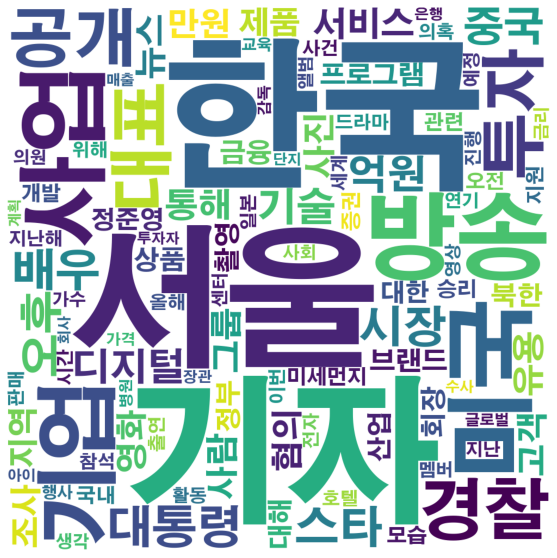

In [116]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result4 = wc.generate_from_frequencies(dict(noun_list4))
plt.figure(figsize=(10,10))
plt.imshow(wc_result2)
plt.axis('off')
plt.show()

In [188]:
keywords8 = news_201903[news_201903['title1'] == '사회일반']['freq_10'].apply(lambda x : x.split(','))

In [189]:
keyword_list8 = []
for i in keywords8.index :
    keyword_list8 += keywords8[i]

In [190]:
sublist = []
for x in keyword_list8 :
    if len(x) == 1 : 
        sublist.append(x)

In [191]:
for x in sublist :
    keyword_list8.remove(x)

In [192]:
count8 = Counter(keyword_list8)
noun_list8 = count8.most_common(100)

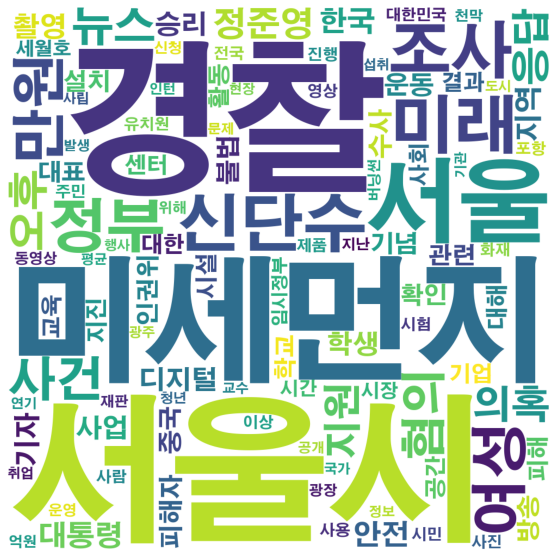

In [193]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result8 = wc.generate_from_frequencies(dict(noun_list8))
plt.figure(figsize=(10,10))
plt.imshow(wc_result8)
plt.axis('off')
plt.show()

# 2019.01 데이터

In [194]:
news_201901 = news[(news['pubdate']>='2019-01-01') & (news['pubdate']<'2019-02-01')]
news_201901

,no,pubdate,pubtime,title1,body,keywords
1,3937779,2019-01-12,0.0,출판/도서,<!--[[--image0--]]//--> ◆ 야바위 게임 / 마이클 슈월비 지음...,"신간,소개"
2,3953320,2019-01-01,0.0,테마기획,◆ 2019 경제기상도 / 부동산 ◆ \n <!--[[--image0--]]//--...,"ㅈ,ㅈ"
3,3953321,2019-01-01,0.0,테마기획,◆ 2019 경제기상도 / 금리 ◆ \n <!--[[--image0--]]//-->...,"금리,경제기상도"
4,3953324,2019-01-01,0.0,테마기획,<!--[[--image0--]]//--> '황금돼지해'인 2019년 기해년(己亥...,"경제,성장,경제기상도"
5,3953326,2019-01-01,0.0,테마기획,◆ 2019 경제기상도 ◆ \n <!--[[--image0--]]//--> 섬유업계...,"섬유,업계"
...,...,...,...,...,...,...
17366,3985796,2019-01-31,232040.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 이누리 객원기자]...,NaN
17367,3985797,2019-01-31,232226.0,방송/TV,<!--[[--image0--]]//--> [ 매일경제 스타투데이 허은경 객원기자...,NaN
17369,3985805,2019-01-31,233923.0,핫이슈,<!--[[--image0--]]//--> [매일경제 스타투데이 한현정 기자]\n...,NaN
17370,3985806,2019-01-31,234727.0,방송/TV,<!--[[--image0--]]//--> [ 매일경제 스타투데이 허은경 객원기자...,NaN


In [195]:
news_201901['body1'] = news_201901['body'].apply(lambda x : re.sub('[0-9]+', '', x))
news_201901['body1'] = news_201901['body1'].apply(lambda x : re.sub('[A-Za-z]+', '', x))
news_201901['body1'] = news_201901['body1'].apply(lambda x : re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》◆■\n]', '', x))

<ipython-input-195-0a277393e451>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201901['body1'] = news_201901['body'].apply(lambda x : re.sub('[0-9]+', '', x))
<ipython-input-195-0a277393e451>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201901['body1'] = news_201901['body1'].apply(lambda x : re.sub('[A-Za-z]+', '', x))
<ipython-input-195-0a277393e451>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [196]:
news_201901

,no,pubdate,pubtime,title1,body,keywords,body1
1,3937779,2019-01-12,0.0,출판/도서,<!--[[--image0--]]//--> ◆ 야바위 게임 / 마이클 슈월비 지음...,"신간,소개",야바위 게임 마이클 슈월비 지음 노정태 옮김 만원 도덕의 문제로 불평등의...
2,3953320,2019-01-01,0.0,테마기획,◆ 2019 경제기상도 / 부동산 ◆ \n <!--[[--image0--]]//--...,"ㅈ,ㅈ",경제기상도 부동산 년 부동산 시장은 롤러코스터를 타듯 요동친 한 해였다 ...
3,3953321,2019-01-01,0.0,테마기획,◆ 2019 경제기상도 / 금리 ◆ \n <!--[[--image0--]]//-->...,"금리,경제기상도",경제기상도 금리 명분도 무엇보다 여력도 없다 원칙적으로 금리 인상은 경기...
4,3953324,2019-01-01,0.0,테마기획,<!--[[--image0--]]//--> '황금돼지해'인 2019년 기해년(己亥...,"경제,성장,경제기상도",황금돼지해인 년 기해년己亥年 대한민국 경제가 다시 활력을 되찾을지 관심이 쏠린다...
5,3953326,2019-01-01,0.0,테마기획,◆ 2019 경제기상도 ◆ \n <!--[[--image0--]]//--> 섬유업계...,"섬유,업계",경제기상도 섬유업계는 지난해 미중 무역분쟁과 유가 하락 경쟁 심화로 인한 ...
...,...,...,...,...,...,...,...
17366,3985796,2019-01-31,232040.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 이누리 객원기자]...,NaN,매일경제 스타투데이 이누리 객원기자 인생술집 모델 한혜진이 동명이인이 많아서 겪...
17367,3985797,2019-01-31,232226.0,방송/TV,<!--[[--image0--]]//--> [ 매일경제 스타투데이 허은경 객원기자...,NaN,매일경제 스타투데이 허은경 객원기자 해피투게더 배우 조병규가 만만찮은 토크 내...
17369,3985805,2019-01-31,233923.0,핫이슈,<!--[[--image0--]]//--> [매일경제 스타투데이 한현정 기자]\n...,NaN,매일경제 스타투데이 한현정 기자배우 최민수가 보복운전 혐의로 기소돼 재판에 넘겨...
17370,3985806,2019-01-31,234727.0,방송/TV,<!--[[--image0--]]//--> [ 매일경제 스타투데이 허은경 객원기자...,NaN,매일경제 스타투데이 허은경 객원기자 해피투게더 김보라와 조병규가 열애설에 대해...


In [197]:
news_201901['freq'] = news_201901['body1'].apply(lambda x : okt.nouns(x))

<ipython-input-197-0e3d2cecc9cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201901['freq'] = news_201901['body1'].apply(lambda x : okt.nouns(x))


In [200]:
news_201901['freq_10'] = news_201901['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))

<ipython-input-200-31a3e3b5e863>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  news_201901['freq_10'] = news_201901['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))
<ipython-input-200-31a3e3b5e863>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201901['freq_10'] = news_201901['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))


In [201]:
news_201901['freq_10'] = news_201901['freq_10'].apply(lambda x : ",".join(x))

<ipython-input-201-f1ada32c9e0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_201901['freq_10'] = news_201901['freq_10'].apply(lambda x : ",".join(x))


In [202]:
keywords8 = news_201901['freq_10'].apply(lambda x : x.split(','))

In [203]:
keyword_list8 = []
for i in keywords8.index :
    keyword_list8 += keywords8[i]

In [204]:
sublist = []
for x in keyword_list8 :
    if len(x) == 1 : 
        sublist.append(x)

In [205]:
for x in sublist :
    keyword_list8.remove(x)

In [206]:
count8 = Counter(keyword_list8)
noun_list8 = count8.most_common(100)

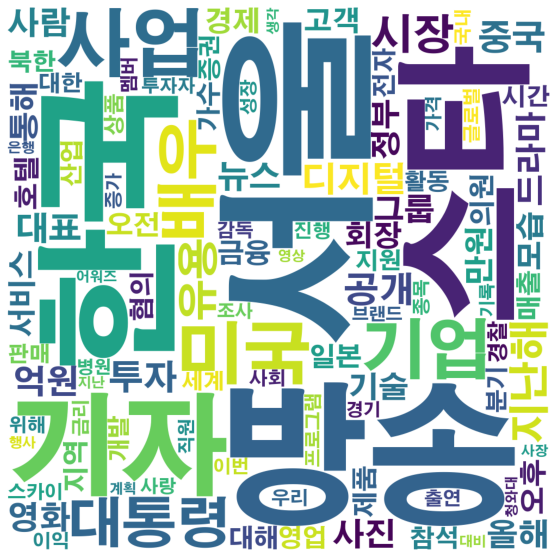

In [207]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result8 = wc.generate_from_frequencies(dict(noun_list8))
plt.figure(figsize=(10,10))
plt.imshow(wc_result8)
plt.axis('off')
plt.show()

# 2020.02 데이터

In [37]:
news_202002 = news[(news['pubdate']>='2020-02-01') & (news['pubdate']<'2020-03-01')]
news_202002

,no,pubdate,pubtime,title1,body,keywords
222119,4376729,2020-02-01,0.0,교육,정부가 대학 기술지주회사의 자회사 주식 보유 한도를 20%에서 10%로 낮추고 보유...,"교육,서울대,기술지주회사"
222360,4377141,2020-02-01,0.0,사회일반,지난해 서울 한 사립대에 입학한 박 모씨(20)는 최근 신입생 후배들을 맞으면서 과...,"젊은꼰대,대학,신입생"
222425,4377242,2020-02-01,0.0,은행,<!--[[--image0--]]//--> 제24대 농협중앙회 회장에 이성희 전 ...,"ㅇ,ㅇ"
222504,4377378,2020-02-01,0.0,법원·검찰·경찰,서울시교육청이 한국유치원총연합회(한유총)에 내린 법인 설립허가 취소처분이 부당하다는...,"법원,한유총"
222507,4377382,2020-02-01,0.0,지역경제,서울시가 위례신사선 도시철도 민간투자사업 우선협상대상자로 가칭 강남메트로주식회사(주...,"위례신사선,우선협상대상자,강남메트로"
...,...,...,...,...,...,...
239813,4407568,2020-02-29,223101.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 원태성 객원기자]...,NaN
239814,4407569,2020-02-29,223433.0,NaN,베트남 당국이 하노이 공항에 이어 호찌민 공항에도 한국발 여객기 착륙을 불허하기로 ...,NaN
239815,4407571,2020-02-29,223529.0,국제사회,"[속보] 미국-아프간 탈레반, 평화합의 타결\t\n[디지털뉴스국]",NaN
239816,4407572,2020-02-29,223727.0,사회일반,중국에서 신종 코로나바이러스 감염증(코로나19)으로 사망한 환자를 부검한 결과 중증...,NaN


In [38]:
news_202002['body1'] = news_202002['body'].apply(lambda x : re.sub('[0-9]+', '', x))
news_202002['body1'] = news_202002['body1'].apply(lambda x : re.sub('[A-Za-z]+', '', x))
news_202002['body1'] = news_202002['body1'].apply(lambda x : re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》◆■\n]', '', x))

<ipython-input-38-fed76ae80a11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_202002['body1'] = news_202002['body'].apply(lambda x : re.sub('[0-9]+', '', x))
<ipython-input-38-fed76ae80a11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_202002['body1'] = news_202002['body1'].apply(lambda x : re.sub('[A-Za-z]+', '', x))
<ipython-input-38-fed76ae80a11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [39]:
news_202002

,no,pubdate,pubtime,title1,body,keywords,body1
222119,4376729,2020-02-01,0.0,교육,정부가 대학 기술지주회사의 자회사 주식 보유 한도를 20%에서 10%로 낮추고 보유...,"교육,서울대,기술지주회사",정부가 대학 기술지주회사의 자회사 주식 보유 한도를 에서 로 낮추고 보유의무 유예기...
222360,4377141,2020-02-01,0.0,사회일반,지난해 서울 한 사립대에 입학한 박 모씨(20)는 최근 신입생 후배들을 맞으면서 과...,"젊은꼰대,대학,신입생",지난해 서울 한 사립대에 입학한 박 모씨는 최근 신입생 후배들을 맞으면서 과거 유쾌...
222425,4377242,2020-02-01,0.0,은행,<!--[[--image0--]]//--> 제24대 농협중앙회 회장에 이성희 전 ...,"ㅇ,ㅇ",제대 농협중앙회 회장에 이성희 전 낙생농협 조합장사진이 당선됐다 일 서울 중구 ...
222504,4377378,2020-02-01,0.0,법원·검찰·경찰,서울시교육청이 한국유치원총연합회(한유총)에 내린 법인 설립허가 취소처분이 부당하다는...,"법원,한유총",서울시교육청이 한국유치원총연합회한유총에 내린 법인 설립허가 취소처분이 부당하다는 법...
222507,4377382,2020-02-01,0.0,지역경제,서울시가 위례신사선 도시철도 민간투자사업 우선협상대상자로 가칭 강남메트로주식회사(주...,"위례신사선,우선협상대상자,강남메트로",서울시가 위례신사선 도시철도 민간투자사업 우선협상대상자로 가칭 강남메트로주식회사주간...
...,...,...,...,...,...,...,...
239813,4407568,2020-02-29,223101.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 원태성 객원기자]...,NaN,매일경제 스타투데이 원태성 객원기자차유리김태희 분이 오민정고보결 분과 마주쳤다일...
239814,4407569,2020-02-29,223433.0,NaN,베트남 당국이 하노이 공항에 이어 호찌민 공항에도 한국발 여객기 착륙을 불허하기로 ...,NaN,베트남 당국이 하노이 공항에 이어 호찌민 공항에도 한국발 여객기 착륙을 불허하기로 ...
239815,4407571,2020-02-29,223529.0,국제사회,"[속보] 미국-아프간 탈레반, 평화합의 타결\t\n[디지털뉴스국]",NaN,속보 미국아프간 탈레반 평화합의 타결\t디지털뉴스국
239816,4407572,2020-02-29,223727.0,사회일반,중국에서 신종 코로나바이러스 감염증(코로나19)으로 사망한 환자를 부검한 결과 중증...,NaN,중국에서 신종 코로나바이러스 감염증코로나으로 사망한 환자를 부검한 결과 중증급성호흡...


In [40]:
news_202002['freq'] = news_202002['body1'].apply(lambda x : okt.nouns(x))

<ipython-input-40-fa4ce5d491f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_202002['freq'] = news_202002['body1'].apply(lambda x : okt.nouns(x))


In [42]:
news_202002['freq_10'] = news_202002['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))

<ipython-input-42-b42e55b5a98f>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  news_202002['freq_10'] = news_202002['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))
<ipython-input-42-b42e55b5a98f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_202002['freq_10'] = news_202002['freq'].apply(lambda x : list(pd.Series(x).value_counts().head(10).index))


In [43]:
news_202002['freq_10'] = news_202002['freq_10'].apply(lambda x : ",".join(x))

<ipython-input-43-49fdf987bd1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_202002['freq_10'] = news_202002['freq_10'].apply(lambda x : ",".join(x))


In [44]:
news_202002

,no,pubdate,pubtime,title1,body,keywords,body1,freq,freq_10
222119,4376729,2020-02-01,0.0,교육,정부가 대학 기술지주회사의 자회사 주식 보유 한도를 20%에서 10%로 낮추고 보유...,"교육,서울대,기술지주회사",정부가 대학 기술지주회사의 자회사 주식 보유 한도를 에서 로 낮추고 보유의무 유예기...,"[정부, 대학, 기술, 지주회사, 자회사, 주식, 보유, 한도, 로, 보유, 의무,...","기술,년,지주회사,대학,보유,자회사,산학,분,법,협력"
222360,4377141,2020-02-01,0.0,사회일반,지난해 서울 한 사립대에 입학한 박 모씨(20)는 최근 신입생 후배들을 맞으면서 과...,"젊은꼰대,대학,신입생",지난해 서울 한 사립대에 입학한 박 모씨는 최근 신입생 후배들을 맞으면서 과거 유쾌...,"[지난해, 서울, 사립대, 입학, 박, 모씨, 최근, 신입생, 후배, 과거, 추억,...","신입생,문화,선배,마임,엑스맨,폐지,학부,전,말,서울대"
222425,4377242,2020-02-01,0.0,은행,<!--[[--image0--]]//--> 제24대 농협중앙회 회장에 이성희 전 ...,"ㅇ,ㅇ",제대 농협중앙회 회장에 이성희 전 낙생농협 조합장사진이 당선됐다 일 서울 중구 ...,"[제대, 농협, 중앙회, 회장, 이성희, 전, 낙생, 농협, 조합, 장사진, 당선,...","농협,중앙회,표,당선자,회장,출신,당선,낙생,이성희,조합"
222504,4377378,2020-02-01,0.0,법원·검찰·경찰,서울시교육청이 한국유치원총연합회(한유총)에 내린 법인 설립허가 취소처분이 부당하다는...,"법원,한유총",서울시교육청이 한국유치원총연합회한유총에 내린 법인 설립허가 취소처분이 부당하다는 법...,"[서울시, 교육청, 한국, 유치원, 연합, 회한, 유총, 법인, 설립, 허가, 취소...","취소,유총,허가,설립,법인,서울시,처분,유치원,집행정지,판단"
222507,4377382,2020-02-01,0.0,지역경제,서울시가 위례신사선 도시철도 민간투자사업 우선협상대상자로 가칭 강남메트로주식회사(주...,"위례신사선,우선협상대상자,강남메트로",서울시가 위례신사선 도시철도 민간투자사업 우선협상대상자로 가칭 강남메트로주식회사주간...,"[서울시, 위례, 신사, 선, 도시철도, 민간, 투자, 사업, 우선, 협상, 대상자...","협상,대상자,메트로,실시,하나,사업,년,도시철도,건설,가칭"
...,...,...,...,...,...,...,...,...,...
239813,4407568,2020-02-29,223101.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 원태성 객원기자]...,NaN,매일경제 스타투데이 원태성 객원기자차유리김태희 분이 오민정고보결 분과 마주쳤다일...,"[매일경제, 스타, 투데이, 태, 객원, 기자, 차, 유리, 김태희, 분, 민정, ...","유리,차,강화,그,말,모습,분,서우,사람,고현정"
239814,4407569,2020-02-29,223433.0,NaN,베트남 당국이 하노이 공항에 이어 호찌민 공항에도 한국발 여객기 착륙을 불허하기로 ...,NaN,베트남 당국이 하노이 공항에 이어 호찌민 공항에도 한국발 여객기 착륙을 불허하기로 ...,"[베트남, 당국, 하노이, 공항, 호찌민, 공항, 한국, 발, 여객기, 착륙, 불허...","공항,베트남,한국,여객기,호찌민,하노이,당국,껀터,이,착륙"
239815,4407571,2020-02-29,223529.0,국제사회,"[속보] 미국-아프간 탈레반, 평화합의 타결\t\n[디지털뉴스국]",NaN,속보 미국아프간 탈레반 평화합의 타결\t디지털뉴스국,"[속보, 미국, 아프간, 탈레반, 타결, 디지털, 뉴스, 국]","국,아프간,탈레반,뉴스,미국,속보,타결,디지털"
239816,4407572,2020-02-29,223727.0,사회일반,중국에서 신종 코로나바이러스 감염증(코로나19)으로 사망한 환자를 부검한 결과 중증...,NaN,중국에서 신종 코로나바이러스 감염증코로나으로 사망한 환자를 부검한 결과 중증급성호흡...,"[중국, 신종, 코로나바이러스, 감염증, 코로, 사망, 환자, 부검, 결과, 중증,...","코로나,환자,손상,중국,보고서,부검,폐,일,것,사망"


In [131]:
keywords5 = news_202002['freq_10'].apply(lambda x : x.split(','))

In [132]:
keyword_list5 = []
for i in keywords5.index :
    keyword_list5 += keywords5[i]

In [133]:
sublist = []
for x in keyword_list5 :
    if len(x) == 1 : 
        sublist.append(x)

In [134]:
for x in sublist :
    keyword_list5.remove(x)

In [135]:
count5 = Counter(keyword_list5)
noun_list5 = count5.most_common(100)

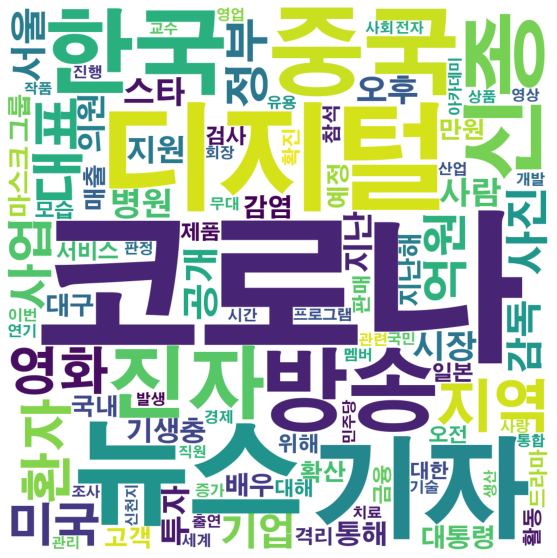

In [136]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result5 = wc.generate_from_frequencies(dict(noun_list5))
plt.figure(figsize=(10,10))
plt.imshow(wc_result5)
plt.axis('off')
plt.show()

In [163]:
keywords6 = news_202002[news_202002['title1'] == '사회일반']['freq_10'].apply(lambda x : x.split(','))

In [164]:
keyword_list6 = []
for i in keywords6.index :
    keyword_list6 += keywords6[i]

In [165]:
sublist = []
for x in keyword_list6 :
    if len(x) == 1 : 
        sublist.append(x)

In [166]:
for x in sublist :
    keyword_list6.remove(x)

In [167]:
count6 = Counter(keyword_list6)
noun_list6 = count6.most_common(100)

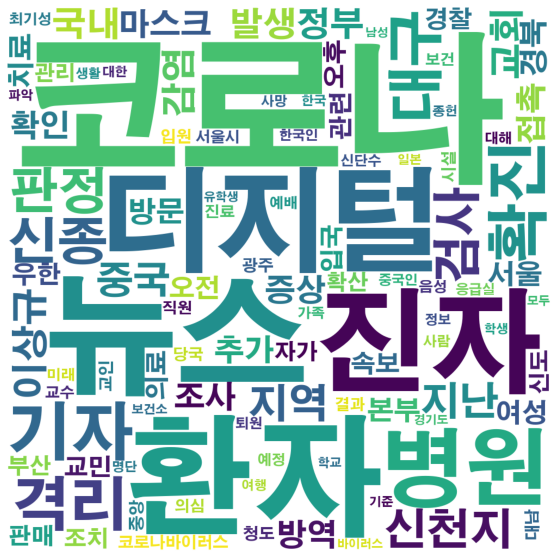

In [168]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result6 = wc.generate_from_frequencies(dict(noun_list6))
plt.figure(figsize=(10,10))
plt.imshow(wc_result6)
plt.axis('off')
plt.show()

In [170]:
keywords7 = news_202002[news_202002['title1'] == '핫이슈']['freq_10'].apply(lambda x : x.split(','))

In [172]:
keyword_list7 = []
for i in keywords7.index :
    keyword_list7 += keywords7[i]

In [173]:
sublist = []
for x in keyword_list7 :
    if len(x) == 1 : 
        sublist.append(x)

In [174]:
for x in sublist :
    keyword_list7.remove(x)

In [175]:
count7 = Counter(keyword_list7)
noun_list7 = count7.most_common(100)

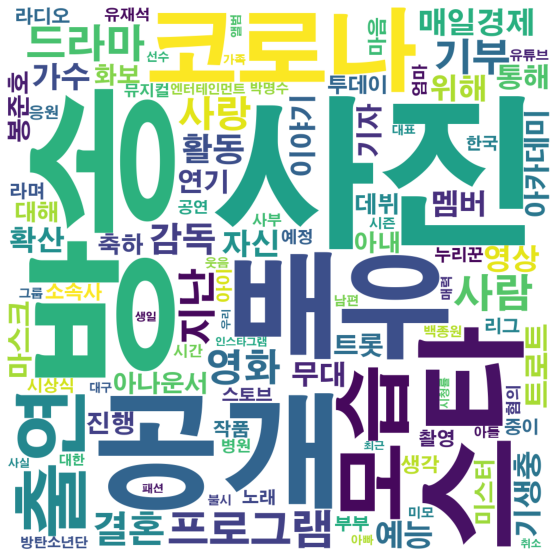

In [176]:
wc = WordCloud(font_path = 'C:/Windows/Fonts/H2GTRE.ttf', background_color='white', width = 1000, height = 1000, max_words = 100, max_font_size = 300)
wc_result7 = wc.generate_from_frequencies(dict(noun_list7))
plt.figure(figsize=(10,10))
plt.imshow(wc_result7)
plt.axis('off')
plt.show()

In [26]:
news['2019-02']['title1'].value_counts()

핫이슈            2317
포토              690
방송/TV           623
유통·섬유·음식료       512
정치일반            502
               ... 
기자 스페셜            1
패션                1
Cover Story       1
국제경영              1
증시지표              1
Name: title1, Length: 131, dtype: int64

In [31]:
news['2019-02'][news['2019-02']['title1'] == '핫이슈']['keywords'].isnull().sum()

2317

In [39]:
news['2019-02'][news['2019-02']['title1'] == '포토']['keywords'].isnull().sum()

690

In [40]:
news['2019-02'][news['2019-02']['title1'] == '방송/TV']['keywords'].isnull().sum()

623

In [43]:
news['2019-02'][news['2019-02']['title1'] == '유통·섬유·음식료']['keywords'].value_counts().head(10)

ㅁ,ㅁ             33
유통,경제           29
ㅇ,ㅇ             12
한국야쿠르트,MPRO3     3
원단,신세계           2
엔제리너스,가맹점        2
신라면세점,제주         2
서울,신라            2
에이블씨엔씨,미샤        2
아모레퍼시픽,창업대출      1
Name: keywords, dtype: int64

In [45]:
news['2019-02'][news['2019-02']['title1'] == '정치일반']['keywords'].value_counts()

정치,기사                                            23
.,.                                              21
지면,계획                                            15
ㅇ,ㅇ                                               7
한국당,전당대회                                          4
                                                 ..
김무성,5.18 망언,지만원,자유한국당,역사왜곡                        1
자유한국당 당권 레이스 막 오른다,황·오·김 3파전                      1
청와대,인사                                            1
한국당 2차 토론회,황교안,오세훈,김진태,오른소리                       1
5.18 망언,시도지사,박원순 서울시장,이용섭 광주시장,5.18 역사왜곡처벌특별법     1
Name: keywords, Length: 270, dtype: int64

In [46]:
len(news['2019-01']['title1'].unique())

133

In [47]:
news['2019-01']['title1'].value_counts()

핫이슈                  2880
방송/TV                 981
포토                    917
정치일반                  730
유통·섬유·음식료             634
                     ... 
Company&Marketing       2
공연                      1
신설법인                    1
라이프                     1
증시지표                    1
Name: title1, Length: 132, dtype: int64

In [48]:
news['2019-01'][news['2019-01']['title1'] == '핫이슈']['keywords'].isnull().sum()

2880

In [49]:
news['2019-01'][news['2019-01']['title1'] == '방송/TV']['keywords'].isnull().sum()

981

In [50]:
news['2019-01'][news['2019-01']['title1'] == '포토']['keywords'].isnull().sum()

917

In [52]:
news['2019-01'][news['2019-01']['title1'] == '정치일반']['keywords'].value_counts().head(10)

정치,기사          36
.,.            22
지면,계획          11
ㅇ,ㅇ            10
문재인,대통령         4
손혜원,기자회견        4
문재인대통령,기자회견     4
노영민,비서실장        4
문재인,기자회견        3
자유한국당,바른미래당     2
Name: keywords, dtype: int64

In [54]:
news['2019-01'][news['2019-01']['title1'] == '유통·섬유·음식료']['keywords'].value_counts().head(10)

유통,경제           45
ㅇ,ㅇ             20
ㅁ,ㅁ             18
배달의민족,수수료        2
KT&G,릴 하이브리드     2
신동빈,롯데           2
페르노리카,임페리얼       2
CU,배달            2
CJ푸드빌,뚜레쥬르       2
롯데마트,블록          2
Name: keywords, dtype: int64

In [21]:
len(news['2020-02']['title1'].unique())

155

In [23]:
news['2020-02']['title1'].value_counts()

핫이슈         1855
사회일반        1733
방송/TV       1197
정치일반         836
포토           783
            ... 
과학기술/특허        1
패션             1
컴퓨터/정보통신       1
인공지능           1
동정             1
Name: title1, Length: 154, dtype: int64

In [32]:
news['2020-02'][news['2020-02']['title1'] == '핫이슈']['keywords'].isnull().sum()

1855

In [33]:
news['2020-02'][news['2020-02']['title1'] == '사회일반']['keywords'].isnull().sum()

521

In [34]:
news['2020-02'][news['2020-02']['title1'] == '사회일반']['keywords'].value_counts()

중기,벤처                            20
코로나,확진자                          12
ㅇ,ㅇ                               8
코로나19,확진자                         7
신종,코로나                            6
                                 ..
인천,부평,대구,코로나19,신천지,집회,코로나바이러스     1
강원도 삼척,확진자                        1
코로나19,156명                        1
경로당,어린이집,방역,성동구,왕십리               1
코로나,마스크                           1
Name: keywords, Length: 1107, dtype: int64

In [157]:
news_201902['title1'].value_counts()

핫이슈            2317
포토              690
방송/TV           623
유통·섬유·음식료       512
정치일반            502
               ... 
국제경영              1
Cover Story       1
기자 스페셜            1
증시지표              1
전시                1
Name: title1, Length: 131, dtype: int64

In [171]:
news_202002['title1'].value_counts()

핫이슈         1855
사회일반        1733
방송/TV       1197
정치일반         836
포토           783
            ... 
패션             1
동정             1
인공지능           1
과학기술/특허        1
컴퓨터/정보통신       1
Name: title1, Length: 154, dtype: int64

In [186]:
news_201903['title1'].value_counts()

핫이슈          2728
포토            852
방송/TV         781
유통·섬유·음식료     694
정치일반          601
             ... 
기획/분석           1
증시지표            1
전시              1
자원·원자재          1
라이프             1
Name: title1, Length: 136, dtype: int64

In [199]:
news_201902[news_201902['freq_10'] == '신단수']

,no,pubdate,pubtime,title1,body,keywords,body1,freq,freq_10
